## Importação de Dados

In [ ]:
import pandas as pd
from sklearn import datasets

In [ ]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

In [ ]:
data_iris = datasets.load_iris()

df_iris = sklearn_to_df(data_iris)

In [ ]:
target_names = data_iris.target_names

In [ ]:
df_iris["target_name"] = None
df_iris.iloc[df_iris.loc[df_iris["target"] == 0].index, 5] = "setosa"
df_iris.iloc[df_iris.loc[df_iris["target"] == 1].index, 5] = "versicolor"
df_iris.iloc[df_iris.loc[df_iris["target"] == 2].index, 5] = "virginica"

target_names = data_iris.target_names

In [ ]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Análise Exploratória

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df_iris.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target_name          False
dtype: bool

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


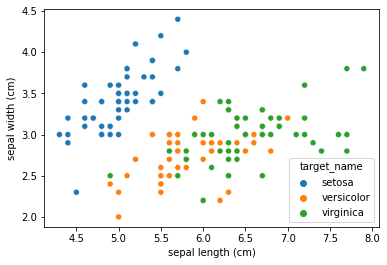

In [ ]:
sns.scatterplot(data=df_iris, x = "sepal length (cm)", y = "sepal width (cm)", hue="target_name")
plt.show()

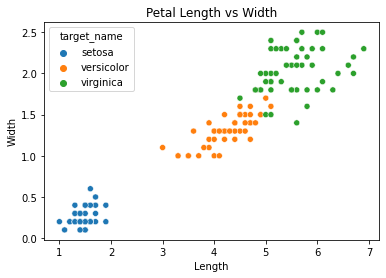

In [ ]:
sns.scatterplot(data=df_iris, x = "petal length (cm)", y = "petal width (cm)", hue="target_name")
plt.title("Petal Length vs Width")
plt.xlabel("Length")
plt.ylabel("Width")
plt.show()

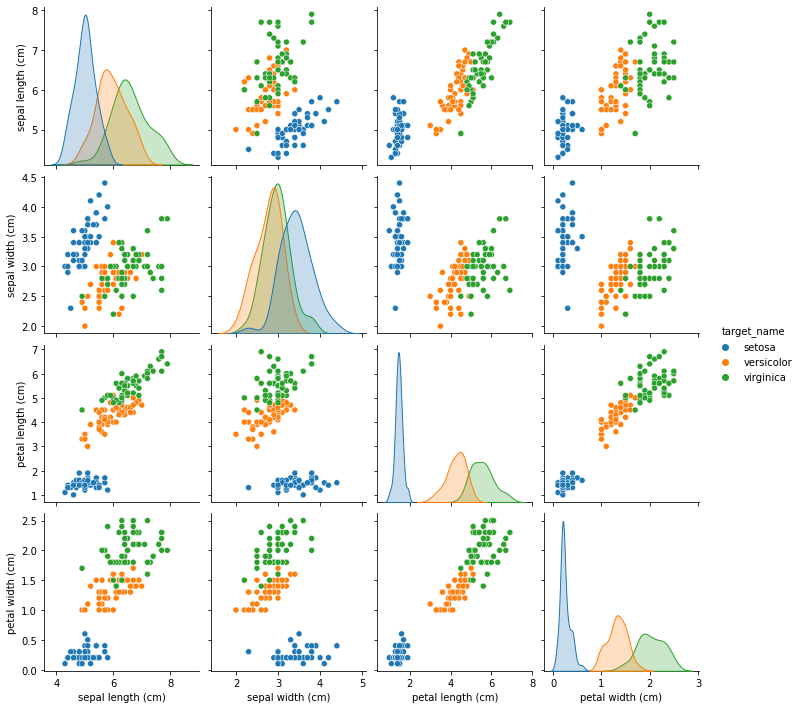

In [ ]:
sns.pairplot(df_iris, hue="target_name")

## Criação e Treinamento do Modelo

### Divisão dos dados

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(data_iris.data, data_iris.target, test_size=0.2)
print("Treino:", len(x_treino))
print("Teste:", len(x_teste))

Treino: 120
Teste: 30


### Criação e Treinamento do Modelo

In [ ]:
from sklearn import tree

In [ ]:
modelo = tree.DecisionTreeClassifier()
modelo = modelo.fit(x_treino, y_treino)

## Vizualiação do Modelo


[Text(348.75, 560.8571428571429, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [39, 38, 43]'),
 Text(232.5, 474.57142857142856, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(465.0, 474.57142857142856, 'X[2] <= 4.75\ngini = 0.498\nsamples = 81\nvalue = [0, 38, 43]'),
 Text(232.5, 388.2857142857143, 'X[3] <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(116.25, 302.0, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(348.75, 302.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(697.5, 388.2857142857143, 'X[2] <= 5.05\ngini = 0.124\nsamples = 45\nvalue = [0, 3, 42]'),
 Text(581.25, 302.0, 'X[1] <= 2.9\ngini = 0.42\nsamples = 10\nvalue = [0, 3, 7]'),
 Text(465.0, 215.71428571428567, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(697.5, 215.71428571428567, 'X[2] <= 4.85\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(581.25, 129.4285714285714, 'X[0] <= 5.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(465.0, 43.14285714285711, 'g

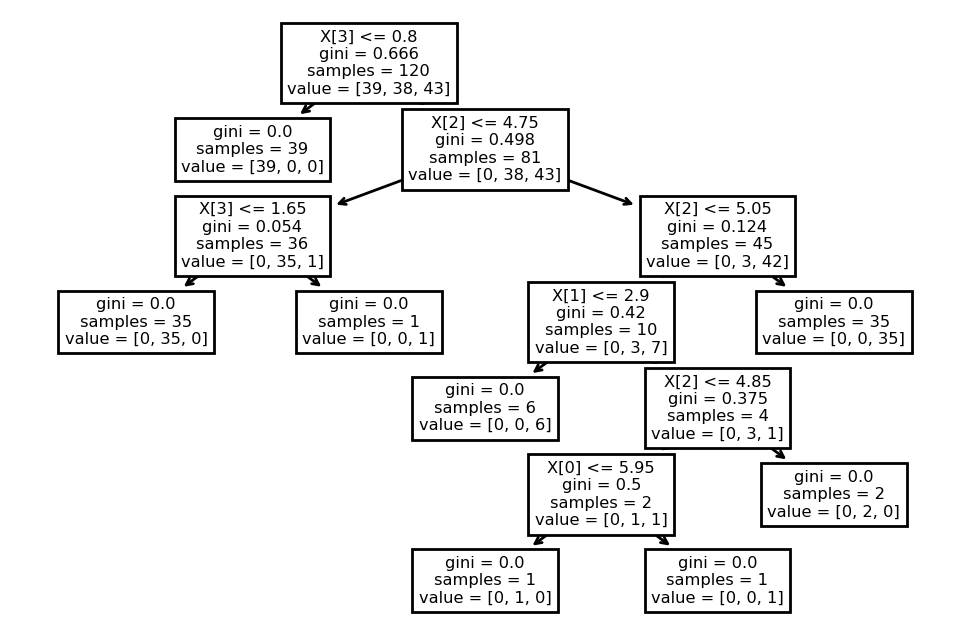

In [ ]:
plt.rcParams['figure.dpi'] = 200
tree.plot_tree(modelo)

## Predições

In [ ]:
y_predicao = modelo.predict(x_teste)

In [ ]:
print(y_predicao)
print(target_names)

[1 0 2 2 0 0 0 0 2 2 1 2 2 0 1 2 1 1 0 0 1 1 1 2 1 1 2 0 0 0]
['setosa' 'versicolor' 'virginica']


## Avaliação do Modelo

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_teste, y_predicao, target_names = target_names)

In [ ]:
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.75      0.82        12
   virginica       0.67      0.86      0.75         7

    accuracy                           0.87        30
   macro avg       0.86      0.87      0.86        30
weighted avg       0.88      0.87      0.87        30

